<a href="https://colab.research.google.com/github/Marvaindrasari/Machine-learning-deep-learning-portofolio/blob/main/04_03_Fire_Marva_Indrasari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root = './data', train = True, transform = transform, download = True)

torch.manual_seed(65)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 64, shuffle = True)

test_dataset = torchvision.datasets.MNIST(root = './data', train = False, transform = transform, download = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 64, shuffle = False)

100%|██████████| 9912422/9912422 [00:00<00:00, 118742963.35it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 30870462.24it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 53779152.06it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20820250.02it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

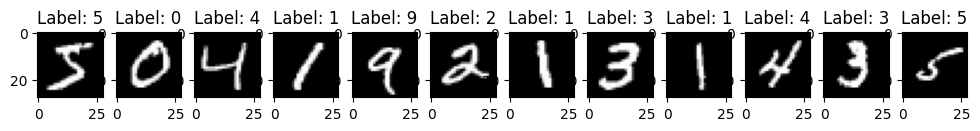

In [ ]:
num_samples = 12
fig, axes = plt.subplots(1, num_samples, figsize = (12,2))

for i in range (num_samples):
  image, label = train_dataset[i]
  image = image.squeeze(). numpy()
  axes[i].imshow(image, cmap = 'gray')
  axes[i].set_title(f'Label: {label}')

plt.show()

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(28*28,128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)

  def forward(self,x):
    x = x.view(-1,28*28)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)

    return x

model = Model()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Latih Model

losses = []

for epoch in range(10):
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    images, labels = data
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

  losses.append(running_loss / len(train_loader))

  print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')

print('Finished Training')

Epoch 1, Loss: 0.3952949900450165
Epoch 2, Loss: 0.18820308953889017
Epoch 3, Loss: 0.14001300314496926
Epoch 4, Loss: 0.11000627543139797
Epoch 5, Loss: 0.09509801486832724
Epoch 6, Loss: 0.08094695010738792
Epoch 7, Loss: 0.07314016564550853
Epoch 8, Loss: 0.06490626425516091
Epoch 9, Loss: 0.0573254340881311
Epoch 10, Loss: 0.05595749848262111
Finished Training


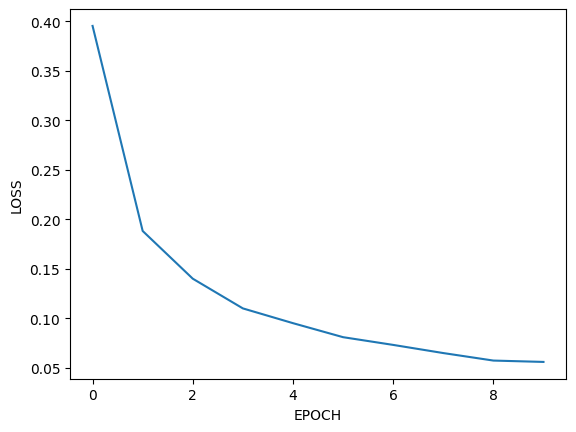

In [ ]:
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.plot(losses)

In [ ]:
# Evaluasi

model.eval()

all_predictions = []
all_labels = []

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    all_labels.extend(labels.numpy())
    all_predictions.extend(predicted.numpy())

accuracy = accuracy_score(all_labels, all_predictions)
confusion = confusion_matrix(all_labels, all_predictions)
report = classification_report(all_labels, all_predictions)

print(f'Accuracy: {accuracy * 100:2f}%')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)


Accuracy: 96.410000%
Confusion Matrix:
[[ 964    0    4    0    0    1    9    1    1    0]
 [   0 1128    5    2    0    0    0    0    0    0]
 [   1    2 1022    2    2    0    1    1    1    0]
 [   0    1   13  982    0    3    0    3    6    2]
 [   1    3   13    0  955    0    3    3    1    3]
 [   3    6    1   17    0  853    8    1    3    0]
 [   3    3    3    1    4    4  940    0    0    0]
 [   1    7   34    6    1    1    1  973    3    1]
 [   3    5   31    4    4    2    3    2  918    2]
 [   2    9    3    8   41   10    3   19    8  906]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.91      0.99      0.95      1032
           3       0.96      0.97      0.97      1010
           4       0.95      0.97      0.96       982
           5       0.98      0.96      0.97       892
           6       0.97     

#####Model diatas bertujuan untuk melatih dataset MNIST menggunakan pytorch dengan neural network sederhana (bukan CNN).
Arsitektur model menggunakan 3 layer neural network dengan layer pertama memiliki 128 neuron, layer kedua 64 neuron, dan layer ketiga memiliki 10 neuron. Pada pelatihan model menggunakan Cross-Entropy dan optimizer Adam.

Model dievaluasi menggunakan accuracy score, confision matrix, F1 Score, Precision, dan recall. Hasil accuracy menunjukkan bahwa model memiliki accuracy tinggi yaitu 96%. Pada F1 Score, Precision, dan recall juga menunjukkan hasil yang tinggi yaitu 90% keatas.